In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
datafile = "rna_tissue_hpa.tsv"
df = pd.read_csv(datafile,sep='\t')

In [2]:
dt = df.loc[:, 'TPM': 'NX']

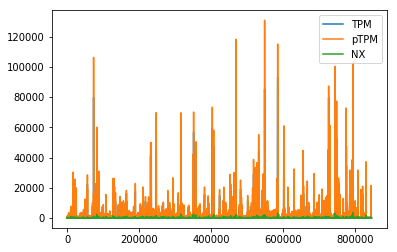

In [3]:
dt.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f926dd74e80>,
      dtype=object)

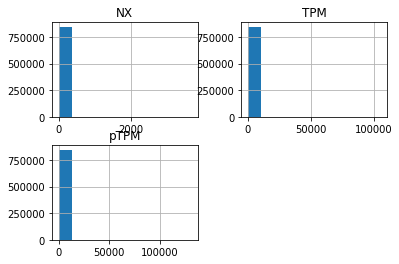

In [4]:
# it is not appropriate to plot histogram directly since most values are small but there are a few large values. 
dt.hist()

In [5]:
dt_tpm = df['TPM'].sort_values()
dt_ptpm = df ['pTPM'].sort_values()
dt_nx = df['NX'].sort_values()
dt_tpm_short = dt_tpm[dt_tpm.index % 1 == 0]
dt_ptpm_short = dt_ptpm[dt_ptpm.index % 1 == 0]
dt_nx_short = dt_nx[dt_nx.index % 1 == 0]
df_short = pd.DataFrame({ 'TPM' : dt_tpm_short, 
                         'pTPM' : dt_ptpm_short,
                         'NX' : dt_nx_short})


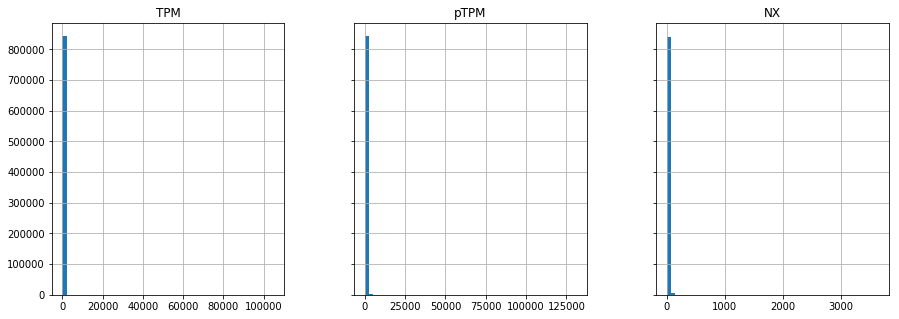

In [6]:
fig, ax = plt.subplots(1,3, sharex='col', sharey='row', figsize=(15,5))
for i in range(3):
    df_short.hist(column = df_short.columns[i], bins = 50, ax=ax[i])

fig.savefig('tissue-rawdata-histogram.png')
fig.savefig('tissue-rawdata-histogram.pdf')
    

Apply MinMaxScaling

In [7]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
dt_tpm_scl = pd.DataFrame(min_max_scaler.fit_transform(dt_tpm.values.reshape(-1, 1)))
dt_ptpm_scl = pd.DataFrame(min_max_scaler.fit_transform(dt_ptpm.values.reshape(-1, 1)))
dt_nx_scl = pd.DataFrame(min_max_scaler.fit_transform(dt_nx.values.reshape(-1, 1)))


In [8]:
dt_tpm_scl_short = dt_tpm_scl[dt_tpm_scl.index % 1 == 0]
dt_ptpm_scl_short = dt_ptpm_scl[dt_ptpm_scl.index % 1 == 0]
dt_nx_scl_short = dt_nx_scl[dt_nx_scl.index % 1 == 0]

df_scl_short = pd.DataFrame({ 'TPM (L scale)' : dt_tpm_scl_short.iloc[:, 0], 
                         'pTPM (L scale)' : dt_ptpm_scl_short.iloc[:, 0],
                         'NX (L scale)' : dt_nx_scl_short.iloc[:, 0]})


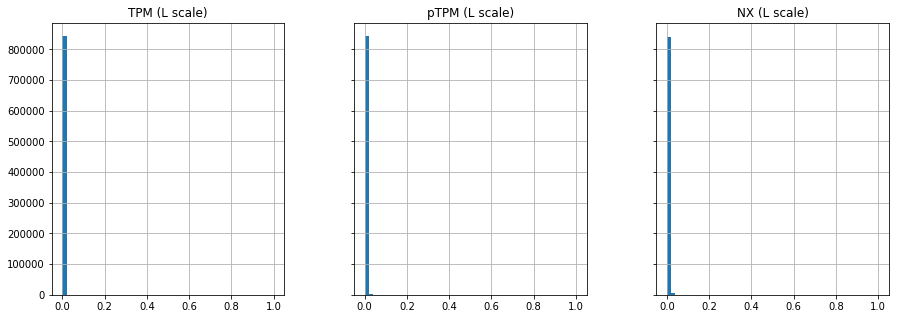

In [9]:
fig, ax = plt.subplots(1,3, sharex='col', sharey='row', figsize=(15,5))
for i in range(3):
    df_scl_short.hist(column = df_scl_short.columns[i], bins = 50, ax=ax[i])
    
fig.savefig('tissue-lscale-histogram.png')
fig.savefig('tissue-lscale-histogram.pdf')

In [10]:
# Use tanh function for scaling
dt_tpm_tanh = df['TPM'].apply(np.tanh)
dt_ptpm_tanh = df['pTPM'].apply(np.tanh)
dt_nx_tanh = df['NX'].apply(np.tanh)
df_tanh = pd.DataFrame({ 'TPM (tanh)' : dt_tpm_tanh, 
                         'pTPM (tanh)' : dt_ptpm_tanh,
                         'NX (tanh)' : dt_nx_tanh})

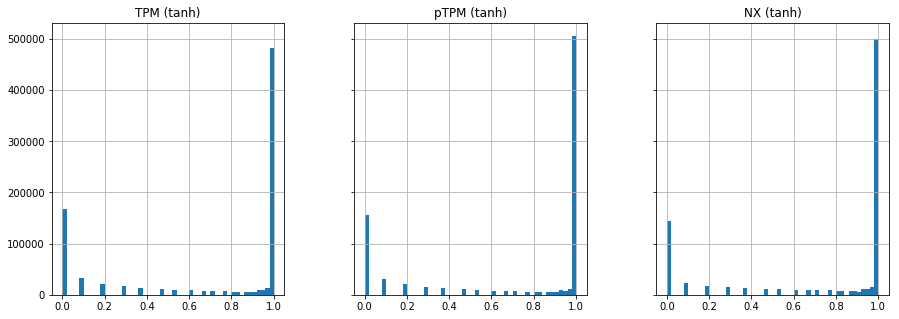

In [11]:
fig, ax = plt.subplots(1,3, sharex='col', sharey='row', figsize=(15,5))
for i in range(3):
    df_tanh.hist(column = df_tanh.columns[i], bins = 50, ax=ax[i])
    
fig.savefig('tissue-tanh-histogram.png')
fig.savefig('tissue-tanh-histogram.pdf')

In [12]:
# Apply sigmoid function

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

dt_tpm_sg = df['TPM'].apply(sigmoid)
dt_ptpm_sg = df['pTPM'].apply(sigmoid)
dt_nx_sg = df['NX'].apply(sigmoid)
df_sg = pd.DataFrame({ 'TPM (sg)' : dt_tpm_sg, 
                         'pTPM (sg)' : dt_ptpm_sg,
                         'NX (sg)' : dt_nx_sg})

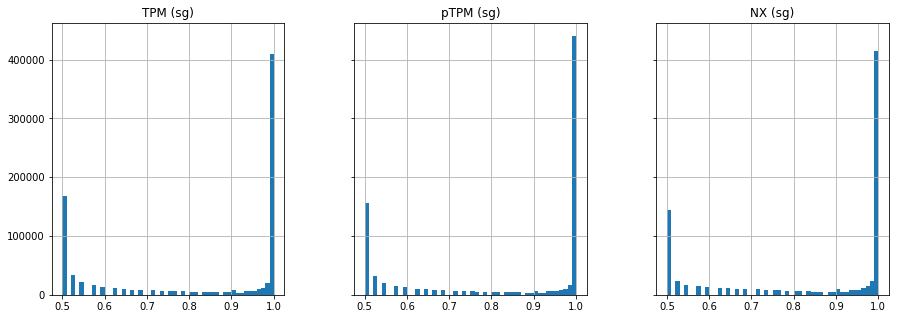

In [14]:
fig, ax = plt.subplots(1,3, sharex='col', sharey='row', figsize=(15,5))
for i in range(3):
    df_sg.hist(column = df_sg.columns[i], bins = 50, ax=ax[i])
    
fig.savefig('tissue-sg-histogram.png')
fig.savefig('tissue-sg-histogram.pdf')

In [15]:
# use the logarithmic scaling function

def scalingfunc(x, U = 10):
    return min(1, np.log2(x + 1)/U)
def logfunc(x):
    return np.log2(x+1)
def calMax(qt):
    # input: percentile [25, 50 ,75]
    return qt[2] + 1.5*(qt[2]-qt[0])
def apply_scale(df, U):
    dt_tpm_lg = df['TPM'].apply(scalingfunc, U=U)
    df_lg = pd.DataFrame({ 
        'TPM (lg, U=%g)'%(U) : dt_tpm_lg,
        })
    return df_lg 
def plot(df_lg, U, figfile):
    fig = plt.figure(figsize=(15,8))
    gs = fig.add_gridspec(1,2)

    ax1 = fig.add_subplot(gs[0,0])
    vf = np.vectorize(scalingfunc)
    x = np.linspace(0,100,2000)
    y = vf(x, U)
    ax1.set_xlabel('Raw data')
    ax1.set_ylabel('Scaled')
    ax1.plot(x, y, 'r')
    ax1.set_ylim(0, 1)

    ax2 = fig.add_subplot(gs[0,1])
    ax2.autoscale()
    ax2.set_xlabel('Scaled')
    ax2.set_ylabel('Percentage')
    df_lg.hist(column = df_lg.columns[0], bins = 50, ax=ax2, density=1)

    bsname = figfile
    fig.savefig('%s.png'%(bsname))
    fig.savefig('%s.pdf'%(bsname))
    plt.show()
    plt.clf()
    plt.close() 



In [16]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec  
qt_TPM = np.percentile(df['TPM'], [25, 50, 75])
U = logfunc(calMax(qt_TPM))
df_lg = apply_scale(df, U)

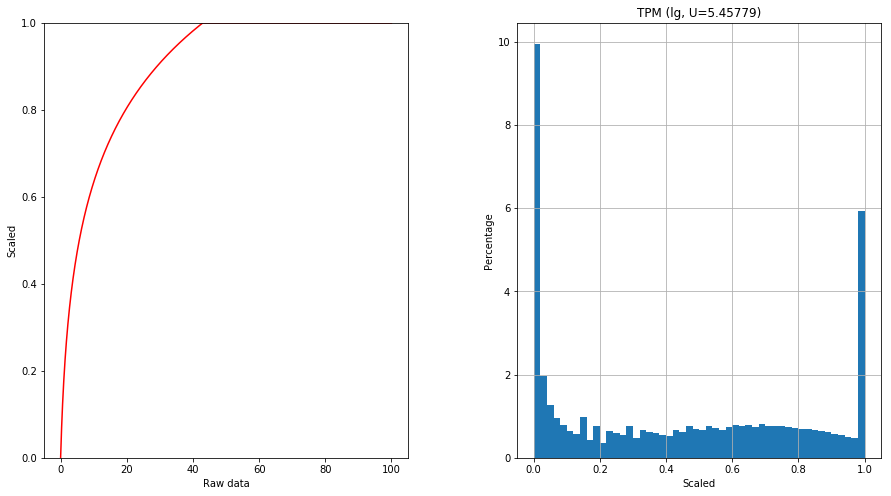

In [17]:
plot(df_lg, U, "fig_ana")